### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Read the Data

In [2]:
data = pd.read_csv("Crash_Data.csv")
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [3]:
data[['Road User','Gender','Age']]

,Road User,Gender,Age
0,Motorcycle rider,Male,38
1,Pedestrian,Female,28
2,Passenger,Male,19
3,Driver,Male,23
4,Motorcycle rider,Male,46
...,...,...,...
52838,Passenger,Female,5
52839,Passenger,Male,19
52840,Passenger,Male,17
52841,Passenger,Male,17


In [4]:
data['Time of day'].value_counts()

Day      30117
Night    22726
Name: Time of day, dtype: int64

In [5]:
data.columns.values

array(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time',
       'Crash Type', 'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User',
       'Gender', 'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day'],
      dtype=object)

### Acronymns

Acronym | Description
--- | ---
Crash ID | ID of the Crash
State | Which State the Crash Occurs
Month | Months of Crash
Year | Year of Crash
Dayweek | Day of the Crash
Time | Time of Crash
Crash Type | Type of Crash
Bus Involvement | Whether Bus Involved or not
Heavy Rigid Truck Involvement | Whether Heavy Rigid Truck Involved or not
Articulated Truck Involvement | Whether Articulated Truck Involved or not
Speed Limit | Speed Limit in the Area
Road User | User that Uses the Road
Gender | Gender
Age | Age
National Remoteness Areas | Area of the crash happens
SA4 Name 2016 | Statistical Areas Level 4
National LGA Name 2017 | Local Governtment Area
National Road Type | Road Type
Christmas Period | Christmas Period or not
Easter Period | Easter Period or no
Age Group | Age Group
Day of week | Weekend/Weekdays
Time of day | Day/Night

In [6]:
data.describe()

,Crash ID,Month,Year,Age
count,5.284300e+04,52843.000000,52843.000000,52843.000000
mean,2.003021e+07,6.568685,2002.729974,39.662377
std,9.383542e+04,3.457347,9.378570,21.806198
min,1.989100e+07,1.000000,1989.000000,-9.000000
25%,1.995111e+07,4.000000,1995.000000,22.000000
50%,2.002144e+07,7.000000,2002.000000,34.000000
75%,2.010408e+07,10.000000,2010.000000,55.000000
max,2.021801e+07,12.000000,2021.000000,101.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [8]:
data.isna().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

### Question

- Which day and time has the most crashes?
- Which month has the most crashes?
- Which type of crashes is the most common?
- How many type on crashes involve bus, heavy rigid, and articulated truck involved?

### Data Preprocessing

In [9]:
data.isna().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [10]:
data_cleaning = data.copy()

In [11]:
data_cleaning.isna().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [12]:
data_cleaning = data_cleaning.dropna(axis=0, subset=['Time','Bus Involvement','Age Group','Gender',
                                                     'Articulated Truck Involvement'])

In [13]:
data_cleaning = data_cleaning.drop(['Crash ID','National Remoteness Areas','SA4 Name 2016','National LGA Name 2017',
                                   'National Road Type','Speed Limit','Heavy Rigid Truck Involvement'],axis=1)

In [14]:
data_cleaning.isna().sum()

State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Articulated Truck Involvement    0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

In [15]:
data_cleaning

,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1,SA,9,2021,Saturday,23:31,Multiple,No,No,Pedestrian,Female,28,No,No,26_to_39,Weekend,Night
5,Qld,9,2021,Saturday,4:00,Multiple,No,No,Motorcycle rider,Male,19,No,No,17_to_25,Weekend,Night
6,WA,9,2021,Saturday,19:10,Single,No,No,Driver,Female,20,No,No,17_to_25,Weekend,Night
8,Qld,9,2021,Wednesday,23:00,Multiple,No,No,Passenger,Female,2,No,No,0_to_16,Weekday,Night
9,Qld,9,2021,Saturday,2:00,Single,No,No,Driver,Male,47,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,NSW,1,1989,Wednesday,17:05,Single,Yes,No,Passenger,Female,5,No,No,0_to_16,Weekday,Day
52839,WA,1,1989,Monday,6:00,Single,No,No,Passenger,Male,19,Yes,No,17_to_25,Weekday,Day
52840,WA,1,1989,Monday,6:00,Single,No,No,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day
52841,WA,1,1989,Monday,6:00,Single,No,No,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day


### When Crash Occurs?

In [16]:
data_cleaned = data_cleaning.copy()

In [17]:
data_cleaned['Time of day'].value_counts()

Day      30035
Night    22637
Name: Time of day, dtype: int64

- Out of 52672 crashes that were available, 30035 occurs in Day time. 22637 happen in night time.

### Crashes by State

In [18]:
number_of_crashes = data_cleaned['State'].value_counts().tolist()

In [19]:
number_of_crashes

[16239, 11502, 10479, 6264, 4545, 1628, 1547, 468]

In [20]:
state_name = data_cleaned['State'].unique()

In [21]:
state_name = ['NSW','Vic','Qld', 'WA','SA','NT', 'Tas','ACT']

In [22]:
state_crash = pd.DataFrame()
state_crash['State'] = state_name
state_crash['Number of Crashes'] = number_of_crashes

In [23]:
state_crash

,State,Number of Crashes
0,NSW,16239
1,Vic,11502
2,Qld,10479
3,WA,6264
4,SA,4545
5,NT,1628
6,Tas,1547
7,ACT,468


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='Number of Crashes'>

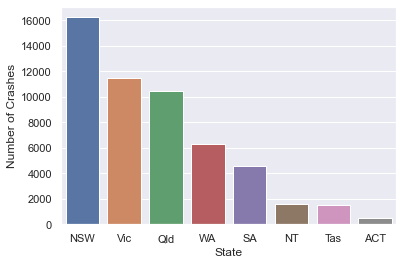

In [24]:
sns.barplot(state_crash['State'],state_crash['Number of Crashes'])

### Crashes over time

In [25]:
year = [1989,1990,1991,1995,1992,1996,1993,1994,2000,1997,1999,1998,2001,2002,2005,2003,2007,
        2006,2004,2009,2008,2010,2012,2016,2011,2017,2015,2013,2019,2014,2018,2020,2021]

In [26]:
number_of_crashes = data_cleaned['Year'].value_counts().tolist()
yearly_crashes = pd.DataFrame()
yearly_crashes['Year'] = year
yearly_crashes['Number of Crashes'] = number_of_crashes

In [27]:
yearly_crashes

,Year,Number of Crashes
0,1989,2790
1,1990,2327
2,1991,2107
3,1995,2006
4,1992,1967
5,1996,1966
6,1993,1945
7,1994,1926
8,2000,1816
9,1997,1756


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Number of Crashes'>

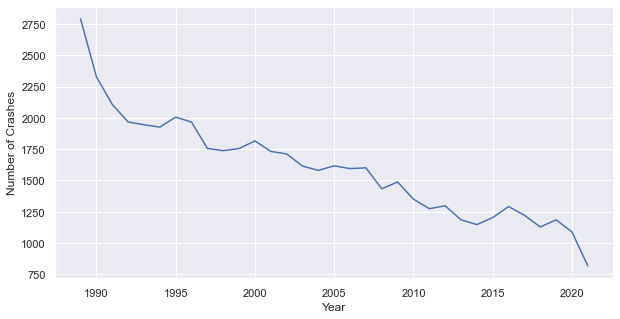

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(yearly_crashes['Year'],yearly_crashes['Number of Crashes'])

### Day or Night Crashes

In [29]:
time = ['Day','Night']

In [30]:
number_of_crashes = data_cleaned['Time of day'].value_counts().tolist()

In [31]:
crash_time = pd.DataFrame()
crash_time['Time'] = time
crash_time['Number of Crashes'] = number_of_crashes

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='Number of Crashes'>

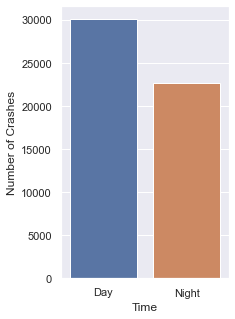

In [32]:
sns.set(rc={'figure.figsize':(3,5)})
sns.barplot(crash_time['Time'],crash_time['Number of Crashes'])

### Day Crashes Happen

In [33]:
data_cleaned

,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1,SA,9,2021,Saturday,23:31,Multiple,No,No,Pedestrian,Female,28,No,No,26_to_39,Weekend,Night
5,Qld,9,2021,Saturday,4:00,Multiple,No,No,Motorcycle rider,Male,19,No,No,17_to_25,Weekend,Night
6,WA,9,2021,Saturday,19:10,Single,No,No,Driver,Female,20,No,No,17_to_25,Weekend,Night
8,Qld,9,2021,Wednesday,23:00,Multiple,No,No,Passenger,Female,2,No,No,0_to_16,Weekday,Night
9,Qld,9,2021,Saturday,2:00,Single,No,No,Driver,Male,47,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,NSW,1,1989,Wednesday,17:05,Single,Yes,No,Passenger,Female,5,No,No,0_to_16,Weekday,Day
52839,WA,1,1989,Monday,6:00,Single,No,No,Passenger,Male,19,Yes,No,17_to_25,Weekday,Day
52840,WA,1,1989,Monday,6:00,Single,No,No,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day
52841,WA,1,1989,Monday,6:00,Single,No,No,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day


In [37]:
days = ['Saturday','Friday','Sunday','Thursday','Wednesday','Tuesday','Monday']
number_of_crashes = data_cleaned['Dayweek'].value_counts().tolist()

In [38]:
days_crash = pd.DataFrame()
days_crash['Days'] = days
days_crash['Number of Crashes'] = number_of_crashes

In [39]:
days_crash

,Days,Number of Crashes
0,Saturday,9668
1,Friday,8636
2,Sunday,8434
3,Thursday,7082
4,Wednesday,6635
5,Tuesday,6127
6,Monday,6090


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Days', ylabel='Number of Crashes'>

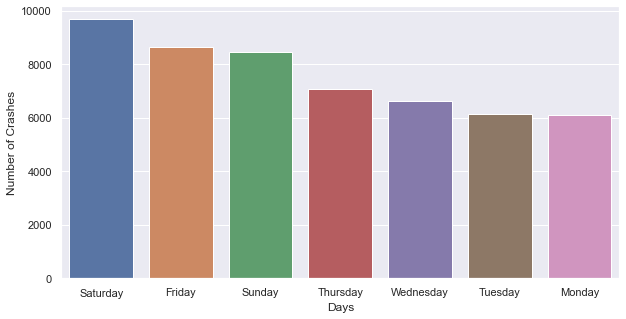

In [41]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(days_crash['Days'],days_crash['Number of Crashes'])